## Notebook for generating D3R blinded subissions based on alchemical free energy simulations

### Instructions
This notebook contains all the analysis carried out for the D3R Grand Challenge 2 analysis by Antonia Mey, Jordi Juarez Jimenez and Julien Michel. Simply run the notebook in order to recreate the analysis done in the accompanying publication. The analysis relies on a small module called freenergyworkflows. Please use version 0.3.5 to recreate the exact results used in the publications. 

Freenergy workflows can be installed from the github repository: https://github.com/michellab/freenrgworkflows or using pip:

```pip install freenergyworkflows```

### Imports

In [1]:
%pylab inline
from networkanalysis.networkanalysis import *
from networkanalysis.plotting import *
import networkanalysis
networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


'0.3.5'

### 1. Average network analysis of Stage 2 simulations with no scaling

In [2]:
pG = PerturbationGraph()

In [3]:
pG.populate_pert_graph('Stage2/raw_data/run001.csv')
pG.add_data_to_graph('Stage2/raw_data/run002.csv')
pG.add_data_to_graph('Stage2/raw_data/run003.csv')

In [4]:
#generate graph and compute weighed average with respect to target compound
graph = pG.graph
pG.compute_weighted_avg_paths('FXR17')
ordered_keys = ['FXR17', 'FXR45', 'FXR46', 'FXR47', 'FXR48', 'FXR49', 'FXR91', 'FXR93', 'FXR95', 'FXR96', 'FXR98', 'FXR99', 'FXR100', 'FXR101', 'FXR102']

In [5]:
pG.format_free_energies(merge_BM=True,intermed_ID='INT', compound_order=ordered_keys)

In [6]:
stage2_DDG = pG.freeEnergyInKcal

In [7]:
print "Full network unscaled free energies are: "
print "---------------------------------------- "
pG.write_free_energies(stage2_DDG)

Full network unscaled free energies are: 
---------------------------------------- 
#FREE ENERGIES ARE:
FXR17      -0.000 ± 0.000
FXR45      -2.880 ± 0.182
FXR46      3.443 ± 0.757
FXR47      1.301 ± 1.166
FXR48      2.017 ± 0.604
FXR49      2.084 ± 0.758
FXR91      4.536 ± 0.700
FXR93      4.427 ± 0.708
FXR95      2.459 ± 0.536
FXR96      2.603 ± 0.605
FXR98      2.945 ± 0.833
FXR99      2.806 ± 0.701
FXR100     3.197 ± 0.901
FXR101     15.361 ± 0.750
FXR102     -0.136 ± 1.270


### comparing to two runs

In [8]:
pG_2r = PerturbationGraph()
pG_2r.populate_pert_graph('Stage2/raw_data/run001.csv')
pG_2r.add_data_to_graph('Stage2/raw_data/run002.csv')
pG_2r.compute_weighted_avg_paths('FXR17')
pG_2r.format_free_energies(merge_BM=True,intermed_ID='INT', compound_order=ordered_keys)
stage2_DDG_2r = pG_2r.freeEnergyInKcal

['FXR100' 'FXR101' 'FXR102' 'FXR17' 'FXR45' 'FXR46' 'FXR47' 'FXR48' 'FXR49'
 'FXR91' 'FXR93' 'FXR95' 'FXR96' 'FXR98' 'FXR99']


(<matplotlib.axes._subplots.AxesSubplot at 0x1148231d0>,
 <matplotlib.figure.Figure at 0x1037f2550>)

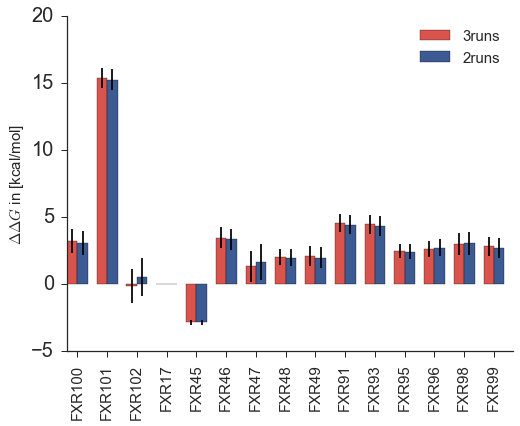

In [9]:
fep = FreeEnergyPlotter(stage2_DDG, stage2_DDG_2r)
fep.plot_bar_plot(legend=('3runs','2runs'))

### 2. Average network analysis of Stage 2 simulations only same charge compounds

In [10]:
pG_no_101 = PerturbationGraph()
pG_no_101.populate_pert_graph('Stage2/raw_data/run001.csv')
pG_no_101.add_data_to_graph('Stage2/raw_data/run002.csv')
pG_no_101.add_data_to_graph('Stage2/raw_data/run003.csv')


In [11]:
pG_no_101.remove_compound_from_graph('FXR101')

In [12]:
pG_no_101.compute_weighted_avg_paths('FXR17')
ordered_keys = ['FXR17', 'FXR45', 'FXR46', 'FXR47', 'FXR48', 'FXR49', 'FXR91', 'FXR93', 'FXR95', 'FXR96', 'FXR98', 'FXR99', 'FXR100', 'FXR102']
pG_no_101.format_free_energies(merge_BM=True,intermed_ID='INT', compound_order=ordered_keys)
stage2_DDG_no_101 = pG_no_101.freeEnergyInKcal

In [13]:
print "Same charge unscaled free energies are: "
print "-----------_--------------------------- "
pG_no_101.write_free_energies(stage2_DDG_no_101, fmt = '%s, %.2f, %.2f')

Same charge unscaled free energies are: 
-----------_--------------------------- 
#FREE ENERGIES ARE:
FXR17, -0.00, 0.00
FXR45, -2.88, 0.18
FXR46, 3.44, 0.76
FXR47, 1.30, 1.17
FXR48, 2.02, 0.60
FXR49, 2.08, 0.76
FXR91, 4.54, 0.70
FXR93, 4.43, 0.71
FXR95, 2.46, 0.54
FXR96, 2.60, 0.61
FXR98, 2.95, 0.83
FXR99, 2.81, 0.70
FXR100, 3.20, 0.90
FXR102, -0.14, 1.27


### 3. Average network analysis of Stage 2 simulations only same charge compounds and mixed scaling 

In [14]:
f = open('Stage2/raw_data/scale-0.7-0.5-refFXR17-mixedscaling.dat')
lines = f.readlines()

In [15]:
scaling = []
for line in lines:
    arr =  line.split()
    if arr[0].startswith('#'):
        continue
    if arr[0] == 'FXR101':
        continue
    dic = {}
    dic[arr[0]] = float(arr[1])
    dic['error'] = float(arr[2])
    scaling.append(dic)

In [16]:
set2_paths = pG_no_101.weightedPathAverages

In [17]:
scaled_set2_paths = []
for p in set2_paths:
    for s in scaling:
        p_keys = p.keys()
        if p_keys[0]!='error':
            if s.has_key(p_keys[0]):
                dic = {}
                dic[p_keys[0]]= p[p_keys[0]]+s[p_keys[0]]
                dic['error'] = np.sqrt(p['error']**2+s['error']**2)
                scaled_set2_paths.append(dic)
        else:
            if s.has_key(p_keys[1]):
                dic = {}
                dic[p_keys[1]]= p[p_keys[1]]+s[p_keys[1]]
                dic['error'] = np.sqrt(p['error']**2+s['error']**2)
                scaled_set2_paths.append(dic)

In [18]:
ordered_keys = ['FXR17', 'FXR45', 'FXR46', 'FXR47', 'FXR48', 'FXR49', 'FXR91', 'FXR93', 'FXR95', 'FXR96', 'FXR98', 'FXR99', 'FXR100', 'FXR102']
pG_no_101.format_free_energies(merge_BM=True,intermed_ID = 'INT', path_dictionary=scaled_set2_paths,compound_order=ordered_keys)

In [19]:
print "Same charge scaled free energies are: "
print "------------------------------------- "
pG.write_free_energies(pG_no_101.freeEnergyInKcal,fmt='%s, %.2f, %.2f')

Same charge scaled free energies are: 
------------------------------------- 
#FREE ENERGIES ARE:
FXR17, -0.00, 0.16
FXR45, -3.80, 0.24
FXR46, 1.61, 0.83
FXR47, -0.85, 1.20
FXR48, 0.16, 0.64
FXR49, 0.92, 0.83
FXR91, 5.09, 0.72
FXR93, 4.47, 0.72
FXR95, 0.31, 0.61
FXR96, -0.25, 0.63
FXR98, 1.23, 0.87
FXR99, 1.50, 0.71
FXR100, 0.44, 0.93
FXR102, -3.72, 1.28


### 4. Average network analysis of Stage 2 simulations mixed scaling 

In [20]:
f = open('Stage2/raw_data/scale-0.7-0.5-refFXR17-mixedscaling.dat')
lines = f.readlines()

In [21]:
scaling = []
for line in lines:
    arr =  line.split()
    if arr[0].startswith('#'):
        continue
    dic = {}
    dic[arr[0]] = float(arr[1])
    dic['error'] = float(arr[2])
    scaling.append(dic)

In [22]:
set2_paths = pG.weightedPathAverages

In [23]:
scaled_set2_paths = []
for p in set2_paths:
    for s in scaling:
        p_keys = p.keys()
        if p_keys[0]!='error':
            if s.has_key(p_keys[0]):
                dic = {}
                dic[p_keys[0]]= p[p_keys[0]]+s[p_keys[0]]
                dic['error'] = np.sqrt(p['error']**2+s['error']**2)
                scaled_set2_paths.append(dic)
        else:
            if s.has_key(p_keys[1]):
                dic = {}
                dic[p_keys[1]]= p[p_keys[1]]+s[p_keys[1]]
                dic['error'] = np.sqrt(p['error']**2+s['error']**2)
                scaled_set2_paths.append(dic)

In [24]:
ordered_keys = ['FXR17', 'FXR45', 'FXR46', 'FXR47', 'FXR48', 'FXR49', 'FXR91', 'FXR93', 'FXR95', 'FXR96', 'FXR98', 'FXR99', 'FXR100', 'FXR101', 'FXR102']
pG.format_free_energies(merge_BM=True,intermed_ID = 'INT', path_dictionary=scaled_set2_paths,compound_order=ordered_keys)

In [25]:
print "Averaged network scaled free energies are: "
print "------------------------------------------ "
pG.write_free_energies(pG.freeEnergyInKcal, fmt='%s, %.2f, %.2f')

Averaged network scaled free energies are: 
------------------------------------------ 
#FREE ENERGIES ARE:
FXR17, -0.00, 0.16
FXR45, -3.80, 0.24
FXR46, 1.61, 0.83
FXR47, -0.85, 1.20
FXR48, 0.16, 0.64
FXR49, 0.92, 0.83
FXR91, 5.09, 0.72
FXR93, 4.47, 0.72
FXR95, 0.31, 0.61
FXR96, -0.25, 0.63
FXR98, 1.23, 0.87
FXR99, 1.50, 0.71
FXR100, 0.44, 0.93
FXR101, 3.00, 0.83
FXR102, -3.72, 1.28


['FXR100' 'FXR101' 'FXR102' 'FXR17' 'FXR45' 'FXR46' 'FXR47' 'FXR48' 'FXR49'
 'FXR91' 'FXR93' 'FXR95' 'FXR96' 'FXR98' 'FXR99']


(<matplotlib.axes._subplots.AxesSubplot at 0x117446c10>,
 <matplotlib.figure.Figure at 0x116cd0850>)

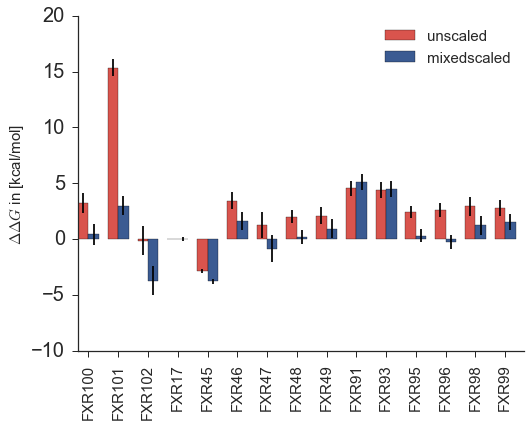

In [26]:
fep = FreeEnergyPlotter(stage2_DDG,pG.freeEnergyInKcal)
fep.plot_bar_plot(legend=('unscaled','mixedscaled'))